<b>Community Detection</b>

This notebook is meant to produce graphs using NetworkX's provided community detection
algorithms and graphing functions.

In [2]:
import csv

import numpy as np
import networkx as nx 
import pandas as pd

In [4]:
#First set of usable data - from Logan Schmidt using James Tattersall's sheets (~1000 pts)
!head one.csv

-13	1	12/01/48	An Esteemed Correspondent	J. Alsop ;Digamma *;Thomas Cranstoun *;John Giblin *;J.M. *	1;	Jan-49;	xx;xx	41;
-12	1	01/01/49	T. Morley	Unknown ;T.J.L. 	1;	Feb-49;Feb-49	xx;xx	9;
-11	1	02/01/49	T.J.L. 	J.W. 	1	03/01/49	xx	41
-10	1	02/01/49	Enquirer	T. Morley 	1	03/01/49	xx	22
-9	1	03/01/49	Thomas Morley	J.W. 	1	04/01/49	xx	22
-8	1	04/01/49	Thomas Morley	UNKNOWN;UNKNOWN	1;1	May-49;Jun-49	xx;xx	41;
-7	1	04/01/49	Collegian	J.W. 	1	05/01/49	xx	22
-6	1	05/01/49	Gomphos					3
-5	1	05/01/49	S.A.G.					74
-4	1	06/01/49	Geometricus	 UNKNOWN	1	07/01/49	xx	47


In [16]:
#Select some data to work with for this session

#first create list using all columns
allData = []
with open('one.csv', 'r') as f:
    filereader = csv.reader(f, delimiter="\t", quotechar='"')
    #next(filereader) # skips header row, we don't want to skip since we don't have a header
    for row in filereader:
            allData.append(row)
            
            
#for this practice, lets keep seperate some data by dates and we can compare them!
#All the interactions during the 1840's using a new bit of code
forties = []
edge = []
i=0
for x in allData:
    date=x[2].split("/")
    if len(date)==3:
        if date[2].startswith('4'): #This helps single out decades instead of specific years
        #if date[2]=="49":
            edge.append([x[3],x[4], x[2]])
            forties.append(edge[i])
            i=i+1
            
#fix the solver column by seperating out responders, whitespace, and formatting unknowns
fixedSolver = []
edge = []
i=0

unknown = {"", "Unknown", "unknown"}
for x in forties:
    if ";" in x[1]:
        solvers = x[1].split(";")
        for y in solvers:
            one=x[0].replace(' ', '')
            two=y.replace(' ', '')
            if(one in unknown):
                one="UNKNOWN"
            if(two in unknown):
                two="UNKNOWN"
            fixedSolver.append([one,two])
    else:
        one=x[0].replace(' ', '')
        two=x[1].replace(' ', '')
        if(one in unknown):
            one="UNKNOWN"
        if(two in unknown):
            two="UNKNOWN"
        fixedSolver.append([one,two])
    #i=i+1

In [20]:
#list of lists with all interactions between authors during the 1840s!

fixedSolver

[['AnEsteemedCorrespondent', 'J.Alsop'],
 ['AnEsteemedCorrespondent', 'Digamma*'],
 ['AnEsteemedCorrespondent', 'ThomasCranstoun*'],
 ['AnEsteemedCorrespondent', 'JohnGiblin*'],
 ['AnEsteemedCorrespondent', 'J.M.*'],
 ['T.Morley', 'UNKNOWN'],
 ['T.Morley', 'T.J.L.'],
 ['T.J.L.', 'J.W.'],
 ['Enquirer', 'T.Morley'],
 ['ThomasMorley', 'J.W.'],
 ['ThomasMorley', 'UNKNOWN'],
 ['ThomasMorley', 'UNKNOWN'],
 ['Collegian', 'J.W.'],
 ['Gomphos', 'UNKNOWN'],
 ['S.A.G.', 'UNKNOWN'],
 ['Geometricus', 'UNKNOWN'],
 ['UNKNOWN', 'J.W.'],
 ['Geometricus', 'UNKNOWN'],
 ['J.W.', 'UNKNOWN'],
 ['Geometricus', 'ThomasWilkinson'],
 ['Philo-Mathematicus', 'ThomasWilkinson'],
 ['UNKNOWN', 'UNKNOWN'],
 ['Theta', 'ThomasWilkinson'],
 ['Theta', 'ThomasWilkinson'],
 ['Theta', 'ThomasWilkinson'],
 ['ThomasWilkinson', 'ThomasWilkinson'],
 ['ThomasWilkinson', 'ThomasWilkinson'],
 ['Geometricus', 'ThomasWilkinson'],
 ['UNKNOWN', 'J.S.'],
 ['UNKNOWN', 'ThomasWilkinson*'],
 ['UNKNOWN', 'J.M.[ofBiggleswade]*'],
 ['UNKNOWN

<font size="+2"><b>Community Graphs</b></font>

Most of this code is directly from the NetworkX youtube tutorital from RTI, except for the cell immediately below which creates a graph using unique interactions.

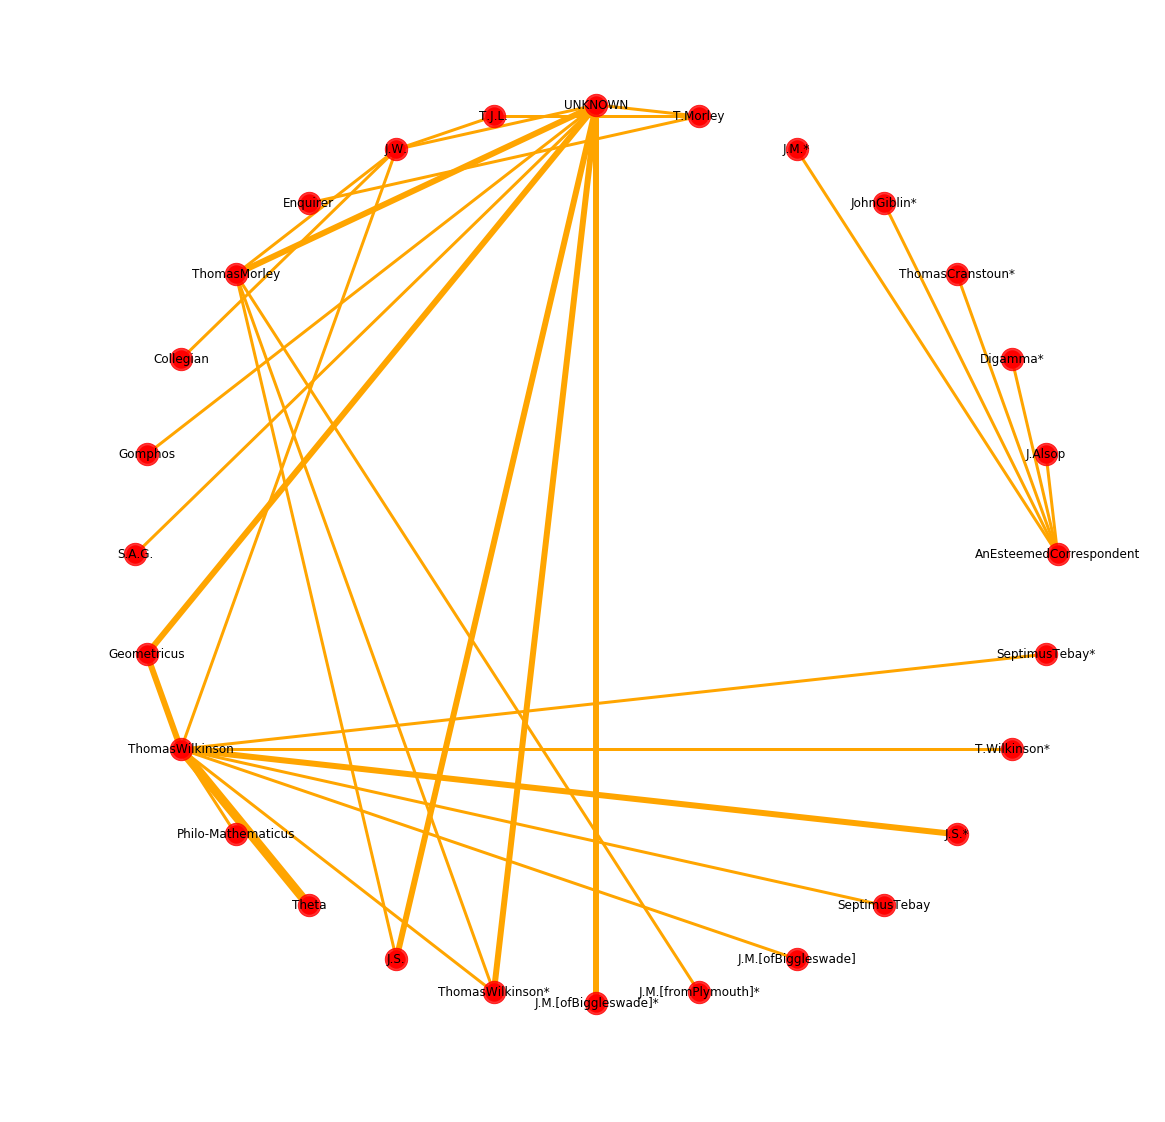

In [22]:
#First, lets graph the set to get an idea of what it looks like.

#Using weighted edges based on unique interactions
weighted = nx.Graph()
for x in fixedSolver:
    num=0;
    for solver in fixedSolver:
        if (x[1]==solver[1]) and (x[0]==solver[0]):
            num=num+1
    #print(x[0],x[1],num)
    num=num*3;
    weighted.add_edge(x[0],x[1], weight=num)
    
#width, length
plt.figure(figsize=(20,20))
plt.axis('off')
    
# generate the layout and place nodes and edges
layout = nx.circular_layout(weighted)

# plot nodes, labels, and edges with options
nx.draw_networkx_nodes(weighted, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx_labels(weighted, pos=layout, font_size=12)

edges = weighted.edges()
#colors = [G[u][v]['color'] for u,v in edges]
weights = [weighted[u][v]['weight'] for u,v in edges]

nx.draw(weighted, pos=layout, edges=edges, width=weights, edge_color='orange')

plt.savefig("week6connections.png", format="PNG")

In [39]:
#import from community algorithms
from networkx.algorithms.community import k_clique_communities, girvan_newman
#import to help color code communities in graph
from helpers import create_color_map

#create graph using edges in fixedSolver list
solverGraph = nx.from_edgelist(fixedSolver)

<b>Girvan Newman</b>

In [40]:
#set up to start a Girvan Newman graph
gn_comm = girvan_newman(solverGraph)

#begin the first iteration
first_iteration_comm = tuple(sorted(c) for c in next(gn_comm))

dict(enumerate(first_iteration_comm))

{0: ['AnEsteemedCorrespondent',
  'Digamma*',
  'J.Alsop',
  'J.M.*',
  'JohnGiblin*',
  'ThomasCranstoun*'],
 1: ['Collegian',
  'Enquirer',
  'Gomphos',
  'J.M.[fromPlymouth]*',
  'J.M.[ofBiggleswade]*',
  'J.S.',
  'J.W.',
  'S.A.G.',
  'T.J.L.',
  'T.Morley',
  'ThomasMorley',
  'ThomasWilkinson*',
  'UNKNOWN'],
 2: ['Geometricus',
  'J.M.[ofBiggleswade]',
  'J.S.*',
  'Philo-Mathematicus',
  'SeptimusTebay',
  'SeptimusTebay*',
  'T.Wilkinson*',
  'Theta',
  'ThomasWilkinson']}

In [41]:
def map_communities(G, communities):
    """Return a mapping of community membership from a community set tuple"""
    community_map = {}
    for node in G.nodes():
        for i, comm in enumerate(communities):
            if node in comm:
                community_map[node] = i
        if community_map.get(node, None) is None:
            community_map[node] = None
    return community_map

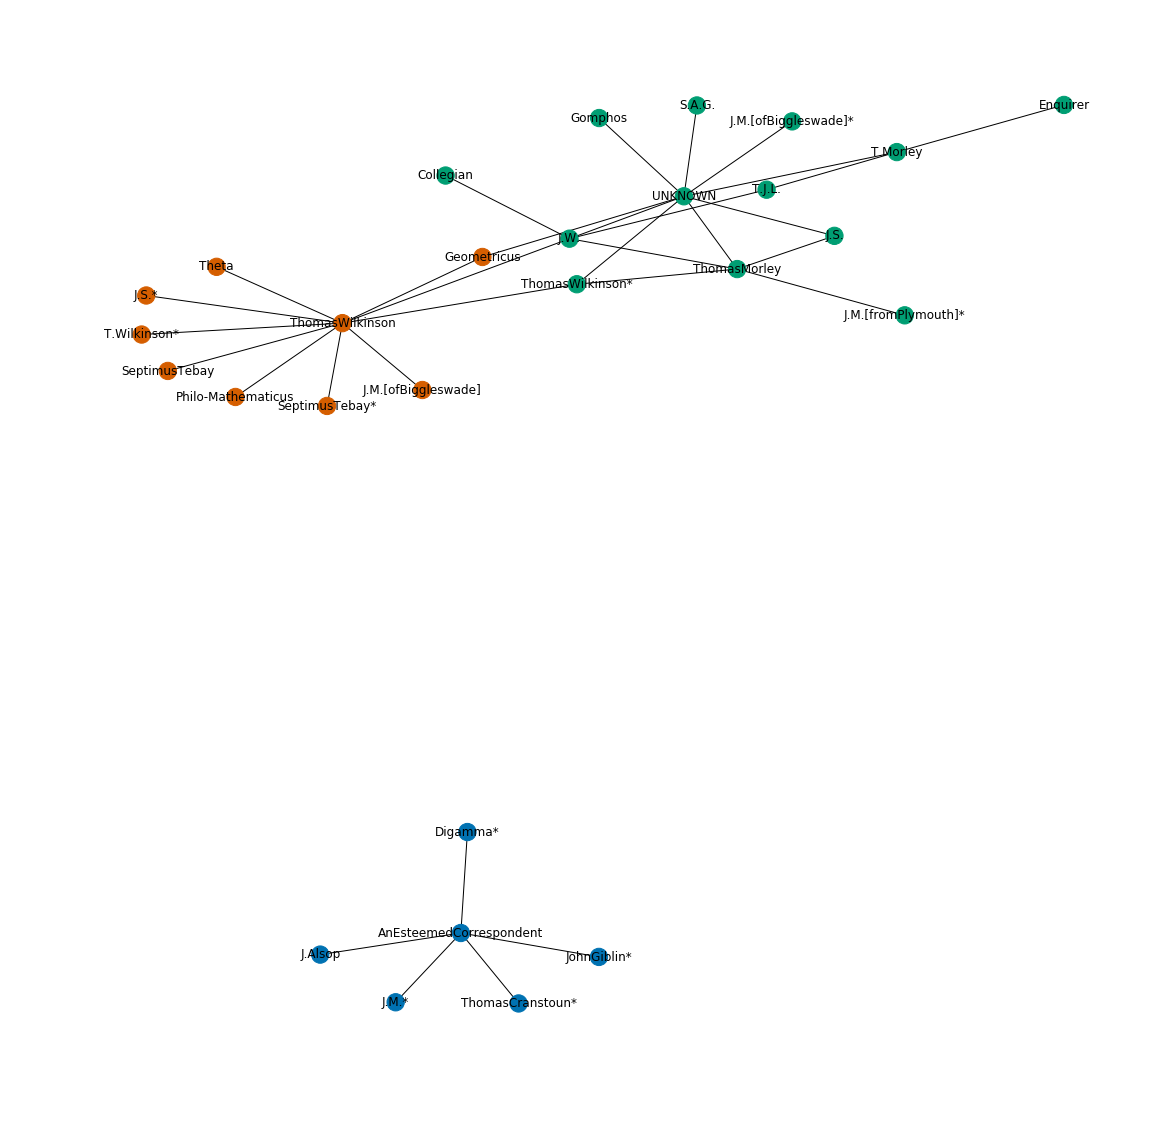

In [50]:
community_map = map_communities(solverGraph, first_iteration_comm)

nx.set_node_attributes(solverGraph, community_map, 'community')

node_colors, color_map, palette = create_color_map(solverGraph, 'community')

#width, length
plt.figure(figsize=(20,20))
plt.axis('off')

nx.draw(solverGraph, node_color=node_colors, with_labels=True)
plt.savefig("week6girvan.png", format="PNG")

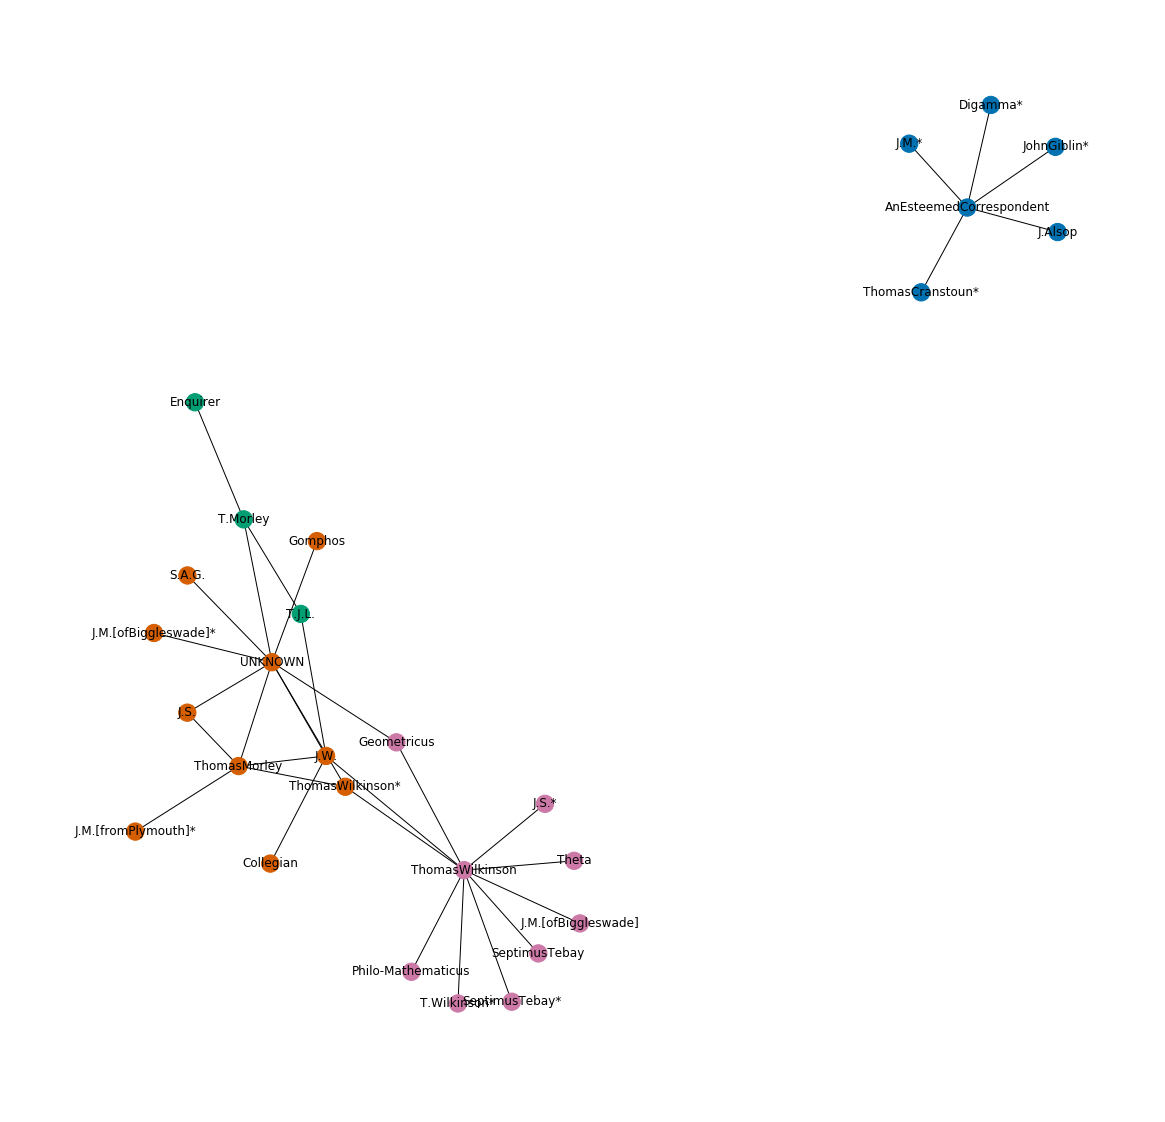

In [52]:
#begin second iteration
second_comm = tuple(sorted(c) for c in next(gn_comm))

community_map_2 = map_communities(solverGraph, second_comm)

nx.set_node_attributes(solverGraph, community_map_2, 'community two')

#width, length
plt.figure(figsize=(20,20))
plt.axis('off')

nx.draw(solverGraph, node_color=node_colors, with_labels=True)
plt.savefig("week6girvan2.png", format="PNG")

<b>K-clique Communities</b>

In [63]:
k_clique = k_clique_communities(solverGraph, 2)

dict(enumerate(k_clique))

{0: frozenset({'AnEsteemedCorrespondent',
            'Digamma*',
            'J.Alsop',
            'J.M.*',
            'JohnGiblin*',
            'ThomasCranstoun*'}),
 1: frozenset({'Collegian',
            'Enquirer',
            'Geometricus',
            'Gomphos',
            'J.M.[fromPlymouth]*',
            'J.M.[ofBiggleswade]',
            'J.M.[ofBiggleswade]*',
            'J.S.',
            'J.S.*',
            'J.W.',
            'Philo-Mathematicus',
            'S.A.G.',
            'SeptimusTebay',
            'SeptimusTebay*',
            'T.J.L.',
            'T.Morley',
            'T.Wilkinson*',
            'Theta',
            'ThomasMorley',
            'ThomasWilkinson',
            'ThomasWilkinson*',
            'UNKNOWN'})}

In [56]:
k_clique = k_clique_communities(solverGraph, 3)
dict(enumerate(k_clique))

{0: frozenset({'J.S.', 'J.W.', 'ThomasMorley', 'ThomasWilkinson*', 'UNKNOWN'})}

In [57]:
k_clique = k_clique_communities(solverGraph, 4)
dict(enumerate(k_clique))

{}

In [58]:
print("Percent of ALL edges that could exist: %0.2f" % (nx.density(solverGraph) * 100))

Percent of ALL edges that could exist: 9.52


In [84]:
k_clique = k_clique_communities(Karate, 3)

k_clique_comm = [list(community) for community in k_clique]

community_map = map_communities(solverGraph, k_clique_comm)

nx.set_node_attributes(solverGraph, community_map, 'community k-clique')

node_colors, color_map, palette = create_color_map(solverGraph, 'community k-clique')

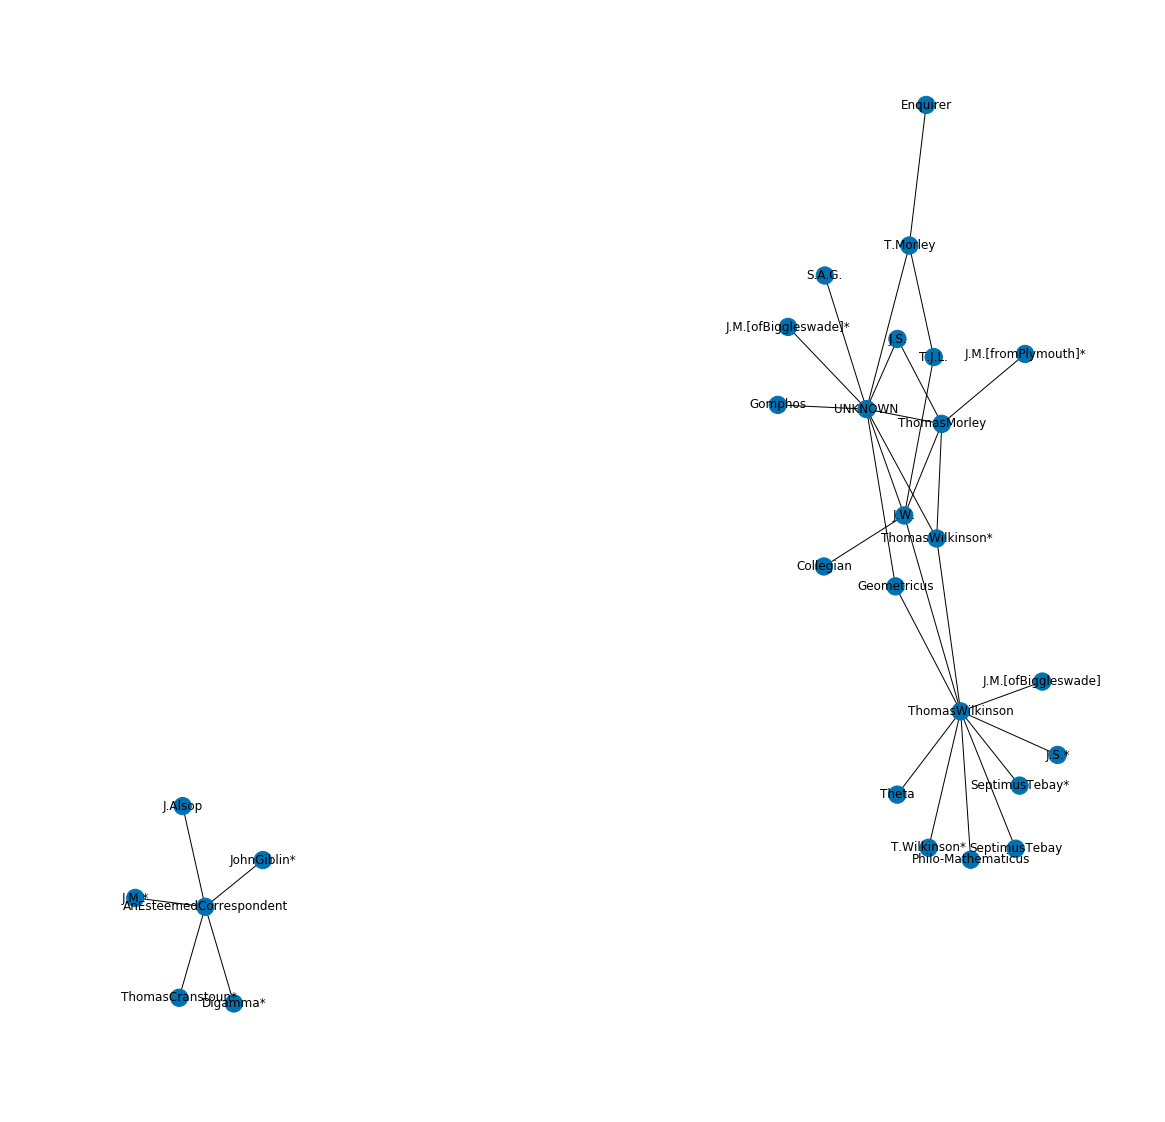

In [85]:
#width, length
plt.figure(figsize=(20,20))
plt.axis('off')
nx.draw(solverGraph, node_color=node_colors, with_labels=True)

<b>Louvain method</b>

In [91]:
import community
#first compute the best partition
partition = community.best_partition(solverGraph)

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(solverGraph)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(solverGraph, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(solverGraph,pos, alpha=0.5)
plt.show()

AttributeError: module 'community' has no attribute 'best_partition'